In [85]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
import glob
from scipy.misc import imread


from keras.preprocessing import image
from keras.models import load_model

In [60]:
DATA_PATH = '/a/data/fisheries_monitoring/data/'
INPUT_WIDTH = 224
INPUT_HEIGHT = 224

In [63]:
def load_test_data():
    X_test_raw = []
    id_test = []
    file_path = glob.glob(DATA_PATH + 'test_stg1/*.jpg')
    for path in file_path:                          
        img = imread(path)
        file_name = os.path.basename(path)
        X_test_raw.append(img)
        id_test.append(file_name)
    return X_test_raw, np.array(id_test)

In [66]:
def resize_test_data(id_test, INPUT_WIDTH, INPUT_HEIGHT):
    X_test = []
    for file_name in id_test:
        path = DATA_PATH + 'test_stg1/' + file_name
        img = image.load_img(path, target_size=(INPUT_WIDTH, INPUT_HEIGHT))
        img = image.img_to_array(img)
        X_test.append(img)
    
    X_test = np.array(X_test)
    X_test /= 255
    
    return X_test

In [75]:
X_test_raw, id_test = load_test_data()
X_test = resize_test_data(id_test, INPUT_WIDTH, INPUT_HEIGHT)

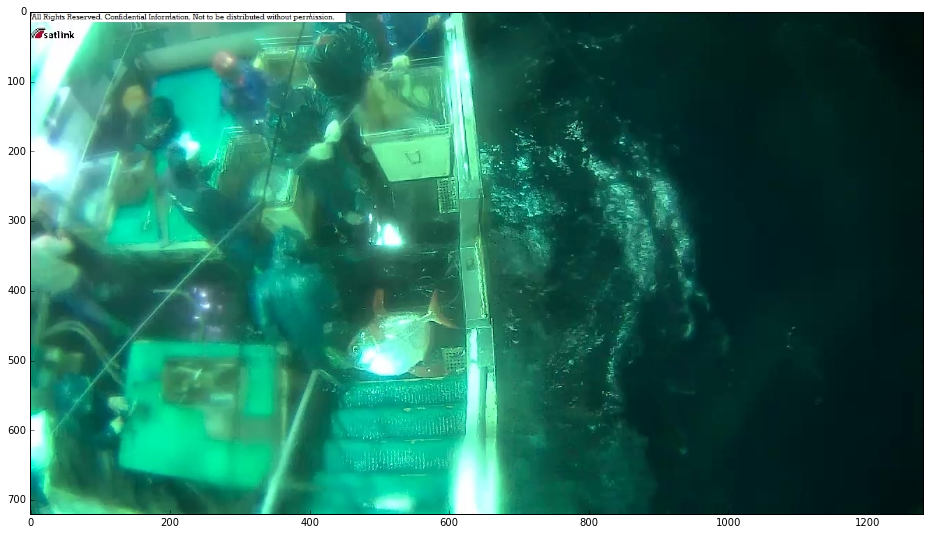

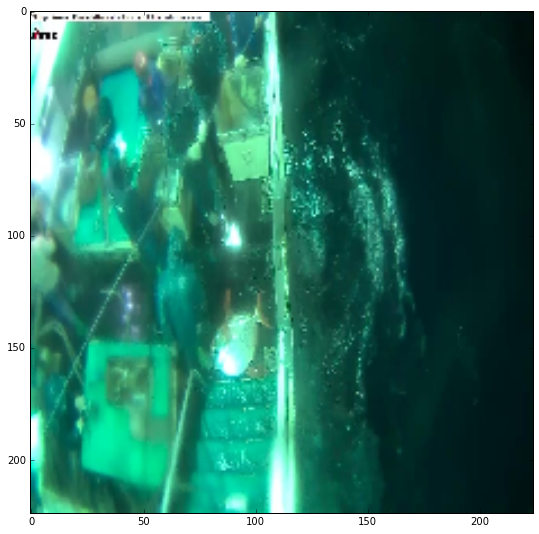

In [73]:
n = np.random.choice(1000)
_, ax = plt.subplots(1, 1, figsize=(60, 9))
img = X_test_raw[n]
ax.imshow(img)
_, ax = plt.subplots(1, 1, figsize=(60, 9))
img = X_test[n]
ax.imshow(img)

In [77]:
localizer = load_model(DATA_PATH + 'models/localizers/localizer_ResNet50_SuperBox.h5')
classifier = load_model(DATA_PATH + 'models/classifiers/classifier_ResNet50_SuperBox.h5')

In [35]:
y_pred = localizer.predict(X_test.astype('float32'), verbose=2)

In [78]:
def transform_prediction(X_test, y_pred, X_test_raw, INPUT_WIDTH, INPUT_HEIGHT):
    ind = []
    y_pred_raw = []
    for i in xrange(len(X_test)):
        height, width, _ = X_test_raw[i].shape
        old_x, old_y, old_w, old_h = y_pred[i]
        new_x = old_x * width / INPUT_WIDTH
        new_y = old_y * height / INPUT_HEIGHT
        new_w = old_w * width / INPUT_WIDTH
        new_h = old_h * height / INPUT_HEIGHT
        y_pred_raw.append(np.array([new_x, new_y, new_w, new_h]))
    return np.array(y_pred_raw)

y_pred_raw = transform_prediction(X_test, y_pred, X_test_raw, INPUT_WIDTH, INPUT_HEIGHT)

In [95]:
def visualize_image(img, img_id, true_box = None, pred_box = None):
    _, ax = plt.subplots(1, 1, figsize=(60, 9))
    ax.imshow(img)
    plt.title(img_id)
    if true_box is not None:
        x, y, width, height = true_box
        ax.add_patch(
        patches.Rectangle(
            (x, y), # x,y
            width, # width
            height, # height
            hatch='\\',
            fill=False      # remove background
                )
            )
    if pred_box is not None:
        x, y, width, height = pred_box
        ax.add_patch(
        patches.Rectangle(
            (x, y), # x,y
            width, # width
            height, # height
            hatch='-',
            fill=False      # remove background
                )
            )

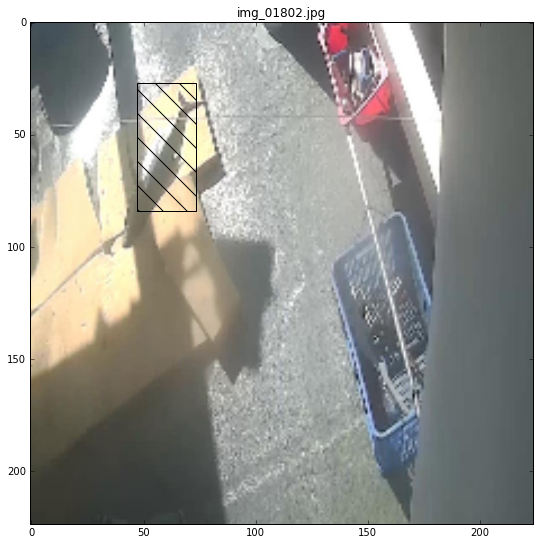

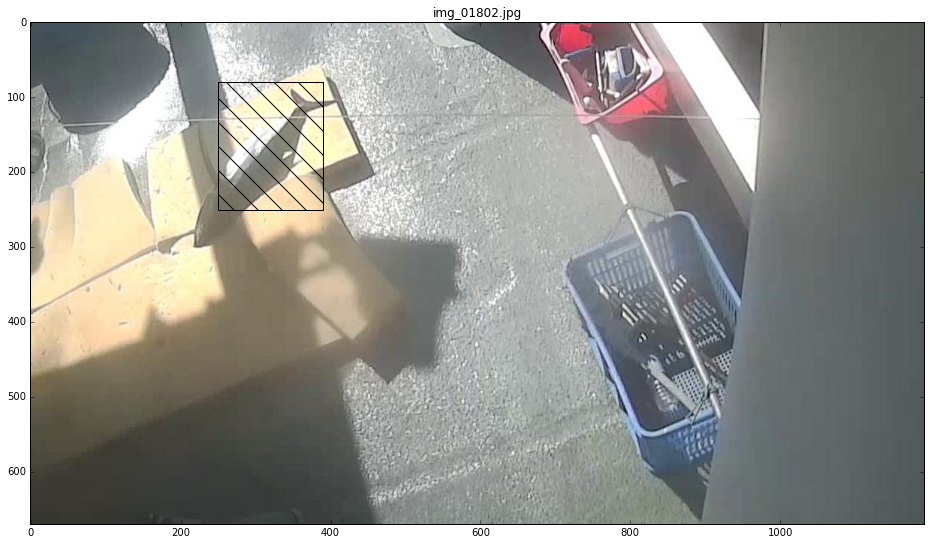

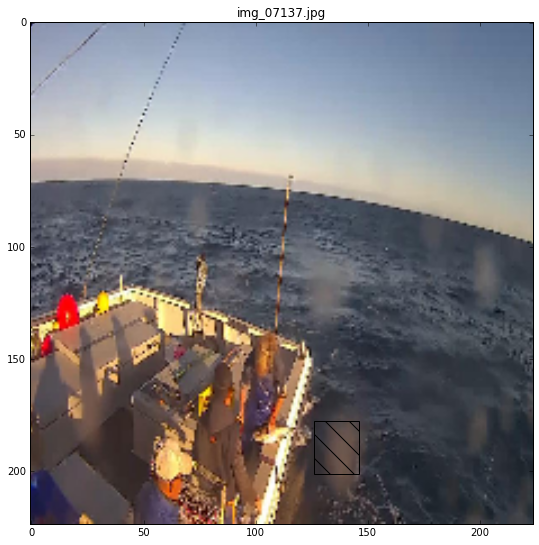

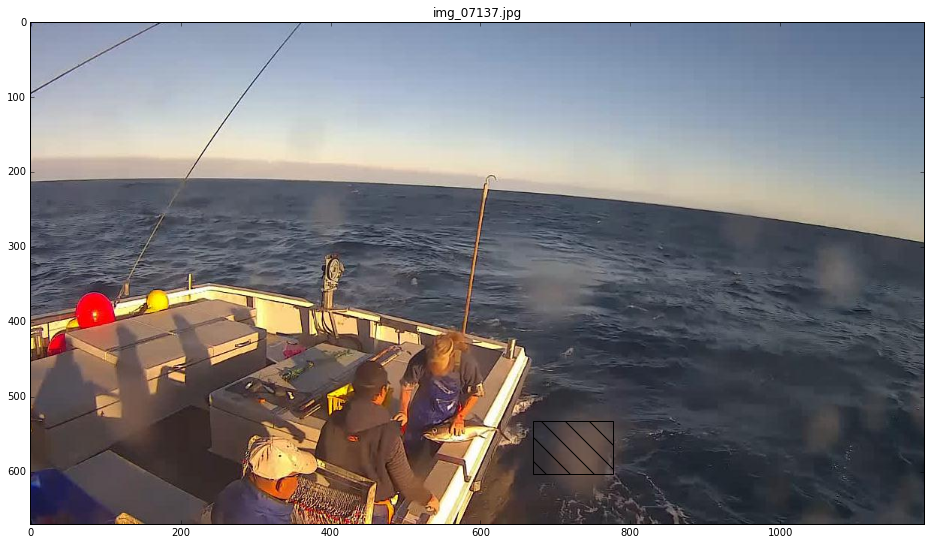

In [96]:
for i in xrange(2):
    n = np.random.choice(len(X_test))
    visualize_image(X_test[n], id_test[n], y_pred[n])
    visualize_image(X_test_raw[n], id_test[n], y_pred_raw[n])

In [108]:
# Crop all the fishes and save them as separate files.

def crop_all_fishes(id_test, y_pred_raw):
    for i in xrange(len(id_test)):
        file_name = DATA_PATH + 'test_stg1/' + id_test[i]
        img = Image.open(file_name)
        
        x, y, width, height = boxes[i]
        left = int(math.ceil(x))
        right = int(math.floor(x + width))
        top = int(math.ceil(y))
        bottom = int(math.floor(y + height))
        img_new = img.crop((left, top, right, bottom))
        try:
            img_new.save(DATA_PATH + "cropped_data/" + id_test[i])
        except:
            print left,right,top,bottom,file_name,i

crop_all_fishes(id_test, boxes)

633 633 581 700 /a/data/fisheries_monitoring/data/test_stg1/img_02194.jpg 877


In [115]:
file_name = DATA_PATH + 'test_stg1/' + id_test[877]
img = Image.open(file_name)

(670, 1192, 3)


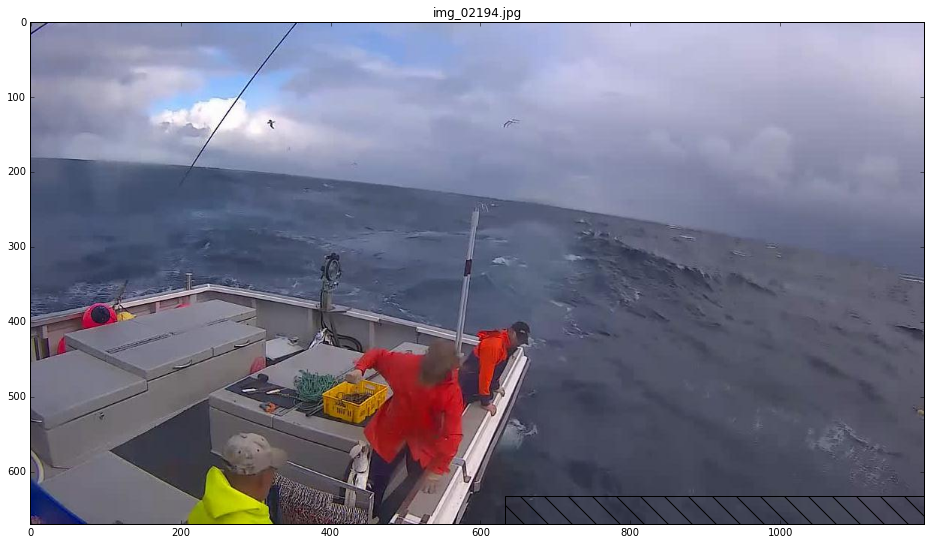

In [114]:
_, ax = plt.subplots(1, 1, figsize=(60, 9))
img = X_test_raw[877]
ax.imshow(img)
plt.title(id_test[877])
x, y, width, height = 633, 633, 581, 700
ax.add_patch(
patches.Rectangle(
    (x, y), # x,y
    width, # width
    height, # height
    hatch='\\',
    fill=False      # remove background
        )
    )
print X_test_raw[877].shape